In [1]:
import pyvisa
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from matplotlib import ticker
import matplotlib.lines as mlines
from  devise.Keithley_2450 import *
import time 

In [2]:
rm = pyvisa.ResourceManager()
# pyvisa.log_to_screen()
res = rm.list_resources(query='?*')
res

('USB0::0x05E6::0x2450::04131625::INSTR',
 'TCPIP0::169.254.59.53::inst0::INSTR',
 'USB0::0x1AB1::0x04B0::DS2G171100064::0::INSTR',
 'USB0::0x1AB1::0x0640::DG5T185350021::0::INSTR',
 'USB::0x05E6::0x2450::04131625::INSTR')

In [3]:
smu = rm.open_resource(res[0])
smu

<'USBInstrument'('USB0::0x05E6::0x2450::04131625::0::INSTR')>

In [4]:
def measure_current(value, compliance, sleep_time):
        smu.write("SOUR:FUNC VOLT")
        smu.write(f"SOUR:volt {value}")
        smu.write(f"SOURce:VOLT:ILIM {compliance}")
        time.sleep(sleep_time)
        I = float(smu.query(':MEASure:CURR?')) * 1000
        return I 
        

In [5]:
def setup_source(smu, v_range, delay):
    smu.write(f'SOUR:VOLT:RANG:AUTO OFF')
    smu.write(f'SOUR:VOLT:RANG {v_range}')
    smu.write(f'SOUR:VOLT:DEL:AUTO OFF')
    smu.write(f'SOUR:VOLT:DEL {delay}')
    

In [6]:
time.sleep(0.5)
I = float(smu.query(':MEASure:CURR?')) * 1000
I

-4.437189e-06

In [8]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")

smu.write(f'SOUR:VOLT:RANG:AUTO OFF')
smu.write(f'SOUR:VOLT:RANG {10}')
smu.write(f'SOUR:VOLT:DEL:AUTO OFF')
smu.write(f'SOUR:VOLT:DEL {0.005}')
smu.write(f'SENS:AZER:ONCE')
smu.write(f'SENS:CURR:AZER OFF')
smu.write(f'SENS:CURR:NPLC {0.01}')
smu.write(f'SENS:COUNT {1}')
# Initialize arrays to store current and time values
I_values = []
t_values = []

duration = 10  # Total measurement time in seconds
interval = 0  # Interval between measurements in seconds
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Time since start of measurements
    
    # Measure current (assuming measure_current is a defined function)
    I = measure_current(5, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Wait the remaining time until the next measurement
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)


smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_1V.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

Time: 0.00s, Current: 6.282076
Time: 0.00s, Current: 6.281727
Time: 0.01s, Current: 6.281088
Time: 0.01s, Current: 6.283471
Time: 0.01s, Current: 6.281611000000001
Time: 0.01s, Current: 6.282948
Time: 0.02s, Current: 6.281727
Time: 0.02s, Current: 6.2826
Time: 0.02s, Current: 6.2838210000000005
Time: 0.02s, Current: 6.281669
Time: 0.03s, Current: 6.281727
Time: 0.03s, Current: 6.282018000000001
Time: 0.03s, Current: 6.2830639999999995
Time: 0.03s, Current: 6.282716
Time: 0.04s, Current: 6.283646
Time: 0.04s, Current: 6.282541
Time: 0.04s, Current: 6.282541
Time: 0.04s, Current: 6.2826
Time: 0.04s, Current: 6.282541
Time: 0.05s, Current: 6.2826569999999995
Time: 0.05s, Current: 6.2826569999999995
Time: 0.05s, Current: 6.282541
Time: 0.06s, Current: 6.282541
Time: 0.06s, Current: 6.282483
Time: 0.06s, Current: 6.282425
Time: 0.06s, Current: 6.282541
Time: 0.06s, Current: 6.282483
Time: 0.07s, Current: 6.282541
Time: 0.07s, Current: 6.282541
Time: 0.07s, Current: 6.282483
Time: 0.07s, Cur

KeyboardInterrupt: 

Time: 0.00s, Current: 0.004093661
Time: 0.10s, Current: 0.004092755
Time: 0.20s, Current: 0.004092633
Time: 0.30s, Current: 0.004092517
Time: 0.40s, Current: 0.0040924
Time: 0.51s, Current: 0.004092285
Time: 0.61s, Current: 0.004092169
Time: 0.71s, Current: 0.004092052
Time: 0.81s, Current: 0.004091941
Time: 0.91s, Current: 0.004091829
Time: 1.01s, Current: 0.004091718
Time: 1.11s, Current: 0.004091598
Time: 1.21s, Current: 0.004091494
Time: 1.31s, Current: 0.004091381
Time: 1.41s, Current: 0.004091268
Time: 1.52s, Current: 0.004091164
Time: 1.62s, Current: 0.004091057
Time: 1.72s, Current: 0.004090953
Time: 1.82s, Current: 0.004090849
Time: 1.92s, Current: 0.004090737
Time: 2.02s, Current: 0.004090637
Time: 2.12s, Current: 0.004090534
Time: 2.22s, Current: 0.00409043
Time: 2.32s, Current: 0.004090328
Time: 2.42s, Current: 0.004090225
Time: 2.53s, Current: 0.004090127
Time: 2.63s, Current: 0.00409003
Time: 2.73s, Current: 0.004089929
Time: 2.83s, Current: 0.004089834
Time: 2.93s, Curre

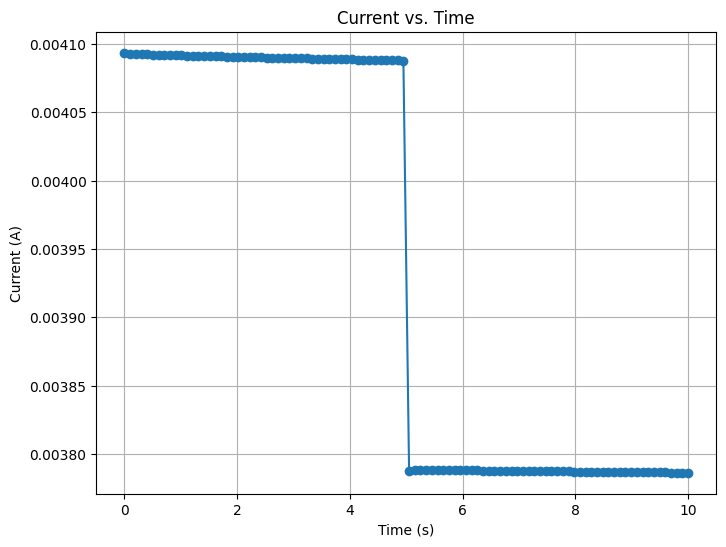

In [20]:
import time
import matplotlib.pyplot as plt
import pandas as pd  # убедитесь, что pandas импортирован
from matplotlib.ticker import FuncFormatter

# Инициализация SMU (Источник-Измеритель)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")
time.sleep(2.5)
%matplotlib inline
# Инициализация списков для хранения значений тока и времени
I_values = []
t_values = []

interval = 0.1  # Интервал между измерениями в секундах

# Первый цикл измерений
duration1 = 5  # Длительность первого цикла измерений в секундах
start_time = time.time()

while time.time() - start_time < duration1:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Время с начала измерений
    
    # Измерение тока с первыми параметрами
    I = measure_current(4, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Ожидание до следующего измерения
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

# Второй цикл измерений с другими параметрами
duration2 = 5  # Длительность второго цикла измерений в секундах
second_start_time = time.time()

while time.time() - second_start_time < duration2:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Используем начальное время первого цикла для непрерывности времени
    
    # Измерение тока с вторыми параметрами (замените на нужные)
    I = measure_current(3.5, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Ожидание до следующего измерения
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

# Отключение выхода SMU
smu.write("OUTPut:STATe OFF")

# Построение графика ток-время
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_1V.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

In [24]:
import time
import matplotlib.pyplot as plt
import pandas as pd  # убедитесь, что pandas импортирован
from matplotlib.ticker import FuncFormatter


%matplotlib inline

# Инициализация списков для хранения значений тока и времени
I_values = []
t_values = []

interval = 0.001  # Интервал между измерениями в секундах
duration1 = 10    # Длительность первого этапа измерений в секундах
duration2 = 10   # Длительность второго этапа измерений в секундах
total_duration = duration1 + duration2  # Общая длительность измерений

start_time = time.time()

while time.time() - start_time < total_duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Время с начала измерений

    # Определение параметров измерения в зависимости от прошедшего времени
    if elapsed_time < duration1:
        # Параметры для первого этапа измерений
        I = measure_current(3, 0.01, 0)
    else:
        # Параметры для второго этапа измерений
        I = measure_current(2.5, 0.01, 0)

    I_values.append(I)
    t_values.append(elapsed_time)

    print(f"Time: {elapsed_time:.2f}s, Current: {I}")

    # Ожидание до следующего измерения
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

# Отключение выхода SMU
smu.write("OUTPut:STATe OFF")

# Построение графика ток-время
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_1V.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()


Time: 0.00s, Current: -9.974044e-09
Time: 1.25s, Current: -8.623029e-08


KeyboardInterrupt: 

Time: 0.00s, Current: 0.003447128
Time: 0.09s, Current: 0.003447267
Time: 0.17s, Current: 0.003447189
Time: 0.26s, Current: 0.003447123
Time: 0.34s, Current: 0.003447054
Time: 0.42s, Current: 0.003446981
Time: 0.51s, Current: 0.003446914
Time: 0.59s, Current: 0.003446846
Time: 0.68s, Current: 0.003446775
Time: 0.76s, Current: 0.003446712
Time: 0.84s, Current: 0.003446637
Time: 0.93s, Current: 0.003446571
Time: 1.01s, Current: 0.003446501
Time: 1.09s, Current: 0.003446429
Time: 1.18s, Current: 0.003446367
Time: 1.26s, Current: 0.003446294
Time: 1.35s, Current: 0.003446227
Time: 1.43s, Current: 0.003446163
Time: 1.51s, Current: 0.003446092
Time: 1.60s, Current: 0.003446022
Time: 1.68s, Current: 0.00344596
Time: 1.76s, Current: 0.003445894
Time: 1.85s, Current: 0.003445832
Time: 1.93s, Current: 0.003445769
Time: 2.01s, Current: 0.003445703
Time: 2.10s, Current: 0.003445638
Time: 2.18s, Current: 0.00344558
Time: 2.27s, Current: 0.003445513
Time: 2.35s, Current: 0.003445454
Time: 2.43s, Cur

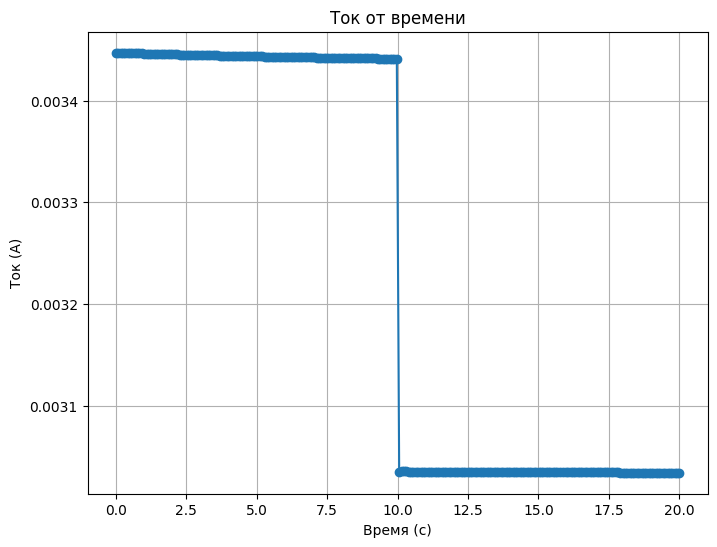

In [16]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import pyvisa  # Для связи с SMU

# Инициализация SMU (Источник-Измеритель)

# Настройка SMU
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")

# Инициализация списков для хранения значений тока и времени
I_values = []
t_values = []

interval = 0.001  # Интервал между измерениями в секундах
duration1 = 10    # Длительность первого этапа измерений в секундах
duration2 = 10    # Длительность второго этапа измерений в секундах
total_duration = duration1 + duration2  # Общая длительность измерений

start_time = time.time()

def measure_current(voltage, current_limit, delay):
    # Установка напряжения и ограничения по току
    smu.write(f'SOUR:VOLT {voltage}')
    smu.write(f'SOUR:CURR:PROT {current_limit}')
    # Задержка, если необходимо
    if delay > 0:
        time.sleep(delay)
    # Измерение тока
    current = smu.query('MEAS:CURR?')
    return float(current)

try:
    while time.time() - start_time < total_duration:
        measurement_start = time.time()
        elapsed_time = measurement_start - start_time  # Время с начала измерений

        # Определение параметров измерения в зависимости от прошедшего времени
        if elapsed_time < duration1:
            # Параметры для первого этапа измерений
            I = measure_current(3, 0.01, 0)
        else:
            # Параметры для второго этапа измерений
            I = measure_current(2.5, 0.01, 0)

        I_values.append(I)
        t_values.append(elapsed_time)

        print(f"Time: {elapsed_time:.2f}s, Current: {I}")

        # Ожидание до следующего измерения
        time_to_sleep = interval - (time.time() - measurement_start)
        if time_to_sleep > 0:
            time.sleep(time_to_sleep)
finally:
    # Отключение выхода SMU вне зависимости от ошибок
    smu.write("OUTPut:STATe OFF")

# Сохранение данных в Excel
df = pd.DataFrame({
    'Time (s)': t_values,
    'Current (A)': I_values
})
df.to_excel('200s_1V.xlsx', index=False)

# Построение графика ток-время
plt.figure(figsize=(8, 6))
plt.plot(t_values, I_values, marker='o')
plt.xlabel('Время (с)')
plt.ylabel('Ток (А)')
plt.title('Ток от времени')
plt.grid(True)
plt.show()


Time: 0.00s, Current: 4.578538
Time: 0.10s, Current: 4.578596
Time: 0.11s, Current: 4.578713
Time: 0.12s, Current: 4.578771
Time: 0.13s, Current: 4.578829000000001
Time: 0.14s, Current: 4.578713
Time: 0.16s, Current: 4.578829000000001
Time: 0.17s, Current: 4.578653999999999
Time: 0.18s, Current: 4.578771
Time: 0.19s, Current: 4.578771
Time: 0.20s, Current: 4.578713
Time: 0.21s, Current: 4.578771
Time: 0.22s, Current: 4.578653999999999
Time: 0.23s, Current: 4.578713
Time: 0.24s, Current: 4.578538
Time: 0.25s, Current: 4.57941
Time: 0.27s, Current: 4.578653999999999
Time: 0.28s, Current: 4.579701
Time: 0.29s, Current: 4.57848
Time: 0.30s, Current: 4.579062
Time: 0.31s, Current: 4.578538
Time: 0.32s, Current: 4.57848
Time: 0.33s, Current: 4.57848
Time: 0.34s, Current: 4.57848
Time: 0.35s, Current: 4.57848
Time: 0.36s, Current: 4.578423
Time: 0.38s, Current: 4.578423
Time: 0.39s, Current: 4.578305
Time: 0.40s, Current: 4.578363
Time: 0.41s, Current: 4.578423
Time: 0.42s, Current: 4.578248


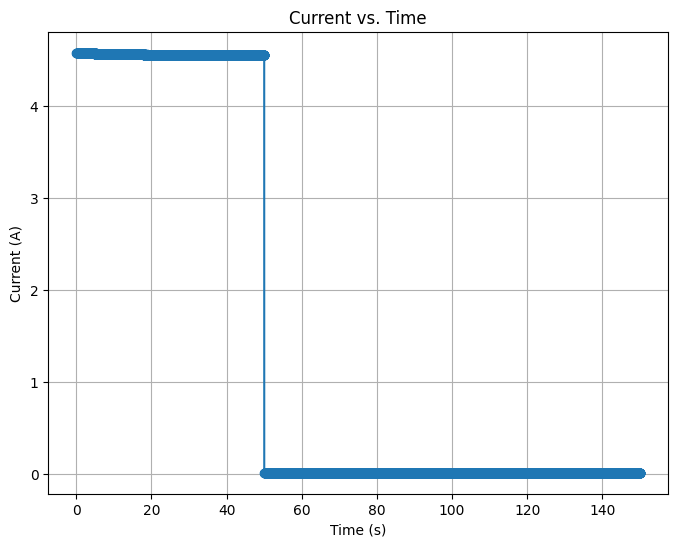

In [14]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")

smu.write(f'SOUR:VOLT:RANG:AUTO OFF')
smu.write(f'SOUR:VOLT:RANG {10}')
smu.write(f'SOUR:VOLT:DEL:AUTO OFF')
smu.write(f'SOUR:VOLT:DEL {0.01}')
smu.write(f'SENS:AZER:ONCE')
smu.write(f'SENS:CURR:AZER OFF')
smu.write(f'SENS:CURR:NPLC {0.01}')
smu.write(f'SENS:COUNT {1}')
# Initialize arrays to store current and time values
I_values = []
t_values = []
interval = 0.01
duration1 = 50  # Длительность первого этапа измерений в секундах
duration2 = 100   # Длительность второго этапа измерений в секундах
total_duration = duration1 + duration2  # Общая длительность измерений

start_time = time.time()

while time.time() - start_time < total_duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Время с начала измерений

    # Определение параметров измерения в зависимости от прошедшего времени
    if elapsed_time < duration1:
        # Параметры для первого этапа измерений
        I = measure_current(5, 0.01, 0)
    else:
        # Параметры для второго этапа измерений
        I = measure_current(0.01, 0.01, 0)

    I_values.append(I)
    t_values.append(elapsed_time)

    print(f"Time: {elapsed_time:.2f}s, Current: {I}")

    # Ожидание до следующего измерения
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

# Отключение выхода SMU
smu.write("OUTPut:STATe OFF")

# Построение графика ток-время
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_1V.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()


Time: 0.00s, Current: 4.196715
Time: 0.20s, Current: 4.195841
Time: 0.40s, Current: 4.195435
Time: 0.60s, Current: 4.194912
Time: 0.81s, Current: 4.19526
Time: 1.01s, Current: 4.194098
Time: 1.21s, Current: 4.193865
Time: 1.41s, Current: 4.193516000000001
Time: 1.61s, Current: 4.193340999999999
Time: 1.81s, Current: 4.1922950000000005
Time: 2.01s, Current: 4.19276
Time: 2.21s, Current: 4.192412
Time: 2.41s, Current: 4.1922369999999995
Time: 2.61s, Current: 4.191946000000001
Time: 2.82s, Current: 4.191713
Time: 3.02s, Current: 4.1914810000000005
Time: 3.22s, Current: 4.191307
Time: 3.42s, Current: 4.190957
Time: 3.62s, Current: 4.190608999999999
Time: 3.82s, Current: 4.18991
Time: 4.02s, Current: 4.189329000000001
Time: 4.22s, Current: 4.18869
Time: 4.42s, Current: 4.18805
Time: 4.62s, Current: 4.187528
Time: 4.83s, Current: 4.186772
Time: 5.03s, Current: 4.1861310000000005
Time: 5.23s, Current: 4.185608
Time: 5.43s, Current: 4.185027
Time: 5.63s, Current: 4.18462
Time: 5.83s, Current: 

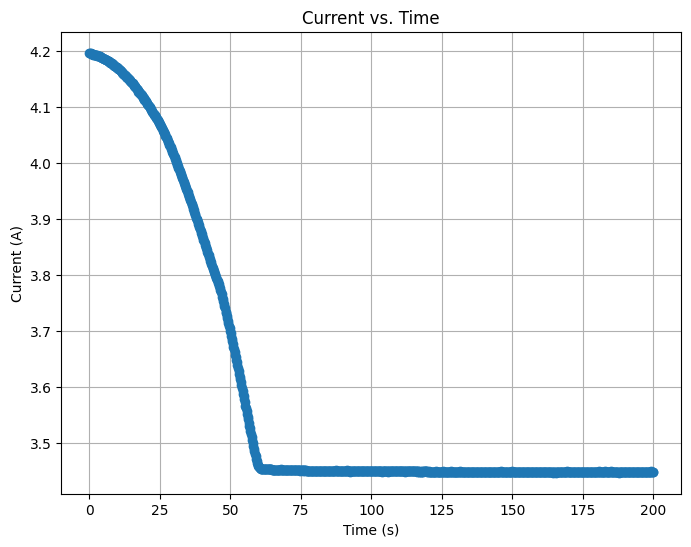

In [12]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write(f'SENS:CURR:RANG:AUTO 0')
smu.write(f'SENS:CURR:RANG {0.010}')
smu.write("OUTPut:STATe ON")

# Initialize arrays to store current and time values
I_values = []
t_values = []

duration = 200  # Total measurement time in seconds
interval = 0.2  # Interval between measurements in seconds
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Time since start of measurements
    
    # Measure current (assuming measure_current is a defined function)
    I = measure_current(3, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Wait the remaining time until the next measurement
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_3V.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

Time: 0.00s, Current: 3.4619590000000002
Time: 0.20s, Current: 3.4613780000000003
Time: 0.40s, Current: 3.461203
Time: 0.60s, Current: 3.461087
Time: 0.81s, Current: 3.4608540000000003
Time: 1.01s, Current: 3.460679
Time: 1.21s, Current: 3.460506
Time: 1.41s, Current: 3.460331
Time: 1.61s, Current: 3.460156
Time: 1.81s, Current: 3.4599230000000003
Time: 2.01s, Current: 3.4599230000000003
Time: 2.21s, Current: 3.45975
Time: 2.41s, Current: 3.4596319999999996
Time: 2.61s, Current: 3.459459
Time: 2.82s, Current: 3.459284
Time: 3.02s, Current: 3.4591689999999997
Time: 3.22s, Current: 3.459051
Time: 3.42s, Current: 3.458878
Time: 3.62s, Current: 3.458818
Time: 3.82s, Current: 3.458645
Time: 4.02s, Current: 3.45847
Time: 4.22s, Current: 3.458355
Time: 4.42s, Current: 3.458237
Time: 4.62s, Current: 3.458064
Time: 4.83s, Current: 3.457947
Time: 5.03s, Current: 3.457714
Time: 5.23s, Current: 3.457656
Time: 5.43s, Current: 3.457481
Time: 5.63s, Current: 3.4573080000000003
Time: 5.83s, Current: 3

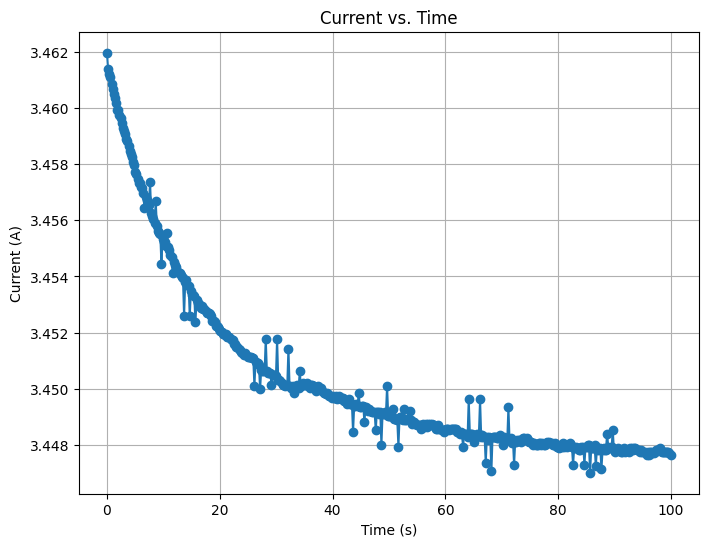

In [13]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write(f'SENS:CURR:RANG:AUTO 0')
smu.write(f'SENS:CURR:RANG {0.010}')
smu.write("OUTPut:STATe ON")

# Initialize arrays to store current and time values
I_values = []
t_values = []

duration = 100  # Total measurement time in seconds
interval = 0.2  # Interval between measurements in seconds
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Time since start of measurements
    
    # Measure current (assuming measure_current is a defined function)
    I = measure_current(3, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Wait the remaining time until the next measurement
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_3V_down.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

In [30]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write(f'SENS:CURR:RANG:AUTO 0')
smu.write(f'SENS:CURR:RANG {0.01}')
smu.write("OUTPut:STATe ON")

# Initialize arrays to store current and time values
I_values = []
t_values = []

duration = 5 # Total measurement time in seconds
interval = 0.5  # Interval between measurements in seconds
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Time since start of measurements
    
    # Measure current (assuming measure_current is a defined function)
    I = measure_current(0.01, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Wait the remaining time until the next measurement
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_5V_2400.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

VisaIOError: VI_ERROR_SYSTEM_ERROR (-1073807360): Unknown system error (miscellaneous error).

Time: 0.00s, Current: 6.143181
Time: 0.50s, Current: 6.580311999999999
Time: 1.00s, Current: 6.8902920000000005
Time: 1.50s, Current: 6.942212
Time: 2.00s, Current: 6.987991
Time: 2.50s, Current: 7.025129
Time: 3.00s, Current: 7.043143
Time: 3.51s, Current: 7.080381999999999
Time: 4.01s, Current: 7.100744
Time: 4.51s, Current: 7.121347999999999
Time: 5.01s, Current: 7.12697
Time: 5.51s, Current: 7.2009099999999995
Time: 6.01s, Current: 7.22255
Time: 6.51s, Current: 7.285235999999999
Time: 7.01s, Current: 7.3412429999999995
Time: 7.51s, Current: 7.356635000000001
Time: 8.02s, Current: 7.35932
Time: 8.52s, Current: 7.391148
Time: 9.02s, Current: 7.414193
Time: 9.52s, Current: 7.4334880000000005
Time: 10.02s, Current: 7.420905
Time: 10.52s, Current: 7.449821
Time: 11.02s, Current: 7.46899
Time: 11.52s, Current: 7.467569999999999
Time: 12.02s, Current: 7.477091
Time: 12.52s, Current: 7.493424999999999
Time: 13.03s, Current: 7.503627
Time: 13.53s, Current: 7.505154
Time: 14.03s, Current: 7.

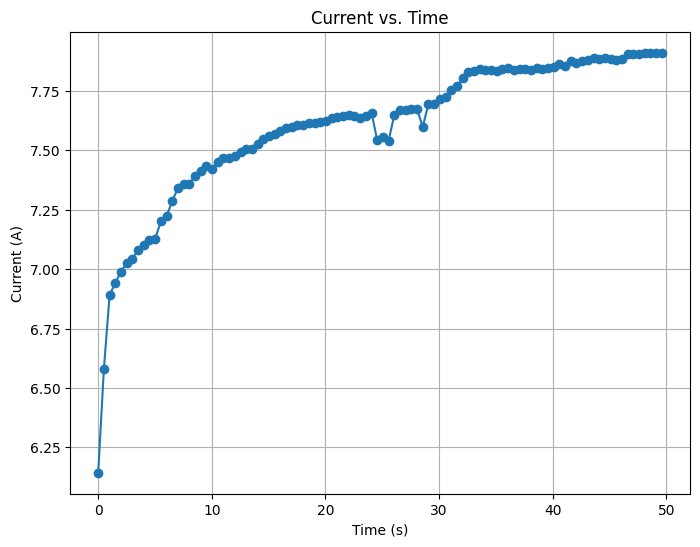

In [27]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")


# Initialize arrays to store current and time values
I_values = []
t_values = []

duration = 50  # Total measurement time in seconds
interval = 0.5  # Interval between measurements in seconds
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Time since start of measurements
    
    # Measure current (assuming measure_current is a defined function)
    I = measure_current(7, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Wait the remaining time until the next measurement
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
df = pd.DataFrame({
            't': t_values,
            'I': I_values
        })
df.to_excel('200s_1V.xlsx', index=False)

plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

In [31]:
import time
import matplotlib.pyplot as plt

# Initialize the SMU (Source Measure Unit)
smu.write('SOUR:FUNC VOLT')
smu.write("OUTPut:STATe ON")


# Initialize arrays to store current and time values
I_values = []
t_values = []

duration = 5  # Total measurement time in seconds
interval = 0.5  # Interval between measurements in seconds
start_time = time.time()

while time.time() - start_time < duration:
    measurement_start = time.time()
    elapsed_time = measurement_start - start_time  # Time since start of measurements
    
    # Measure current (assuming measure_current is a defined function)
    I = measure_current(1, 0.01, 0)
    I_values.append(I)
    t_values.append(elapsed_time)
    
    print(f"Time: {elapsed_time:.2f}s, Current: {I}")
    
    # Wait the remaining time until the next measurement
    time_to_sleep = interval - (time.time() - measurement_start)
    if time_to_sleep > 0:
        time.sleep(time_to_sleep)

smu.write("OUTPut:STATe OFF")

# Plot the current vs. time graph
plt.figure(figsize=(8, 6))
plt.plot(t_values, I_values, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs. Time')
plt.grid(True)
plt.show()

VisaIOError: VI_ERROR_SYSTEM_ERROR (-1073807360): Unknown system error (miscellaneous error).